In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [15]:
df=pd.read_csv("cats_vs_dogs.csv")
df.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [17]:
print(df.columns)

Index(['Unnamed: 0', 'state', 'n_households', 'percent_pet_households',
       'n_pet_households', 'percent_dog_owners', 'n_dog_households',
       'avg_dogs_per_household', 'dog_population', 'percent_cat_owners',
       'n_cat_households', 'avg_cats_per_household', 'cat_population'],
      dtype='object')


In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1074s 6us/step


In [21]:
   model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"\n Test Accuracy: {test_accuracy:.4f}") 

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3513 - loss: 1.7807 - val_accuracy: 0.5509 - val_loss: 1.2758
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5726 - loss: 1.2118 - val_accuracy: 0.6069 - val_loss: 1.1216
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6366 - loss: 1.0393 - val_accuracy: 0.6430 - val_loss: 1.0338
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6749 - loss: 0.9353 - val_accuracy: 0.6612 - val_loss: 0.9754
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7114 - loss: 0.8344 - val_accuracy: 0.6723 - val_loss: 0.9407
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7398 - loss: 0.7567 - val_accuracy: 0.6872 - val_loss: 0.9186
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7597 - loss: 0.6846 - val_accuracy: 0.6983 - val_loss: 0.8871
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7818 - loss: 0.6331 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


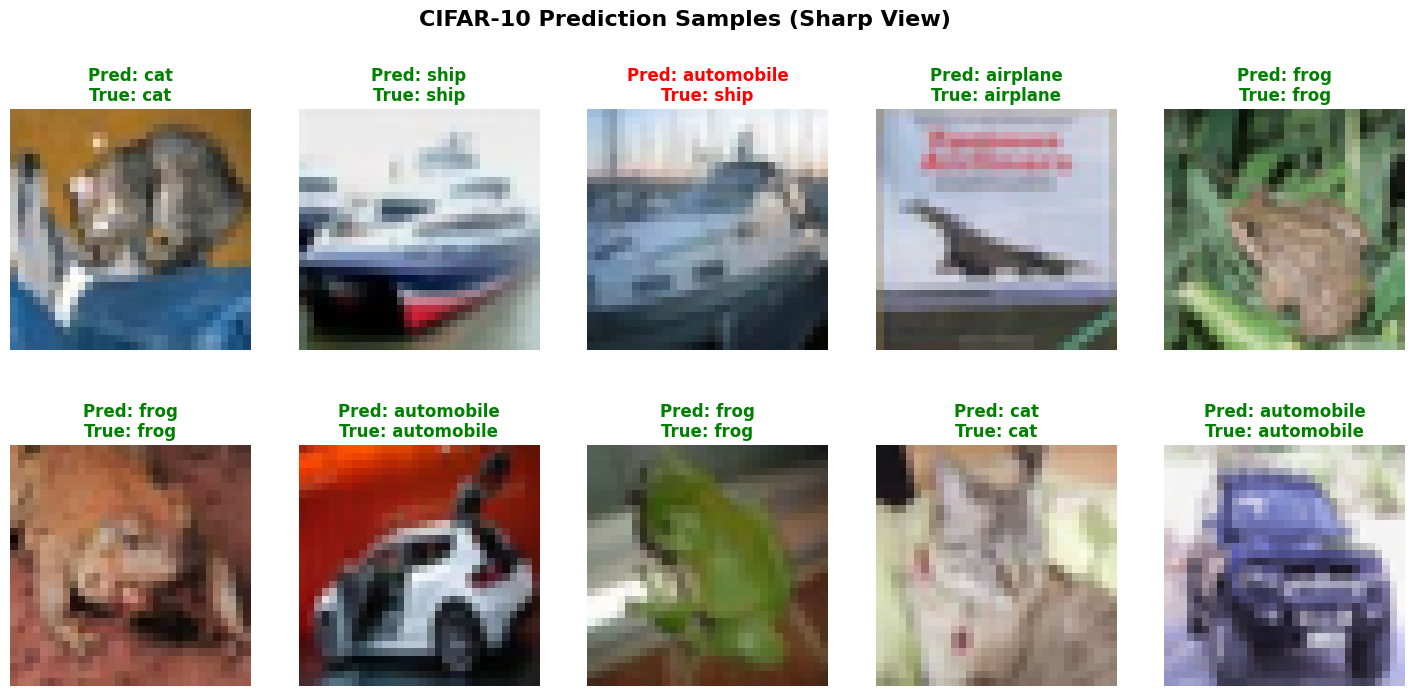

In [29]:
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

plt.figure(figsize=(18, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], interpolation='nearest') 
    pred_label = class_names[y_pred_classes[i]]
    true_label = class_names[y_test[i][0]]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}",
              color=color, fontsize=12, fontweight='bold')
    plt.axis('off')

plt.suptitle("CIFAR-10 Prediction Samples (Sharp View)", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.88)
plt.show()